DFS shows us all vertices that are reachable from the starting vertex, and the corresponding tree even shows us a path to each vertex. However, this path is not necessarily the shortest path.

There is another traversal algorithm, Breadth-First Search (BFS), which also shows us all vertices reachable from the starting vertex, but the paths that are generated are also guaranteed to use the fewest number of edges.

Informal Procedure for BFS:

We initialize arrays for visited (track which vertices we visited/marked), parent (record parent for BFS Tree), and distance (smallest number of edges from start vertex to this vertex).

Initially, the starting is marked and has distance 0.

We also initialize a queue containing only the starting vertex.

While the queue is not empty, extract the first vertex $u$ from the queue. If it is unmarked, then check each of its unmarked neighbors and do the following:
*  mark the neighbor
*  set parent of the neighbor to u
*  set distance to the neighbor as distance to $u$ plus 1
*  add the neighbor to the queue

Repeat until the queue is empty

In [ ]:
numVertices = 14

A, B, C, D, E, F, G, H, I, J, K, L, M, N = range (14) # A = 0, B = 1, C = 2, ...

adjlst = [[B, J],           # A
          [M, A, C, K, L],  # B
          [G, B],           # C
          [N, F],           # D
          [G],              # E
          [D, I],           # F
          [H, C, L, E],     # G
          [G],              # H
          [F],              # I
          [A, L],           # J
          [L, B],           # K
          [J, K, M, B, G],  # L
          [L, B],           # M
          [D]]

In [ ]:
# [OPTIONAL] convert index to uppercase letter
def idx2char (idx):
  return chr (ord ('A') + idx)

In [ ]:
from collections import deque

# deque stands for double-ended queue, and it
# implements a doubly-linked list, which means efficient
# append, pop, appendleft, and popleft, all O(1) time

def bfs (adjlst, start):
  visited = [False] * len (adjlst)
  parent = [False] * len (adjlst)
  dist = [False] * len (adjlst)
  visited[start] = True
  dist[start] = 0

  q = deque ()
  q.append (start)

  while len (q) != 0:
    curr = q.popleft ()
    for nbr in adjlst[curr]:
      if visited[nbr] == False:
        visited[nbr] = True
        parent[nbr] = curr
        dist[nbr] = dist[curr] + 1
        q.append (nbr)

  print (visited)
  print (dist)
  for i in range (len (parent)):
    if parent[i] == False:
      print (f"No parent for {idx2char (i)}")
    else:
      print (f"Parent of {idx2char (i)} is {idx2char (parent[i])}")

bfs (adjlst, G)

[True, True, True, False, True, False, True, True, False, True, True, True, True, False]
[3, 2, 1, False, 1, False, 0, 1, False, 2, 2, 1, 2, False]
Parent of A is B
Parent of B is C
Parent of C is G
No parent for D
Parent of E is G
No parent for F
No parent for G
Parent of H is G
No parent for I
Parent of J is L
Parent of K is L
Parent of L is G
Parent of M is L
No parent for N


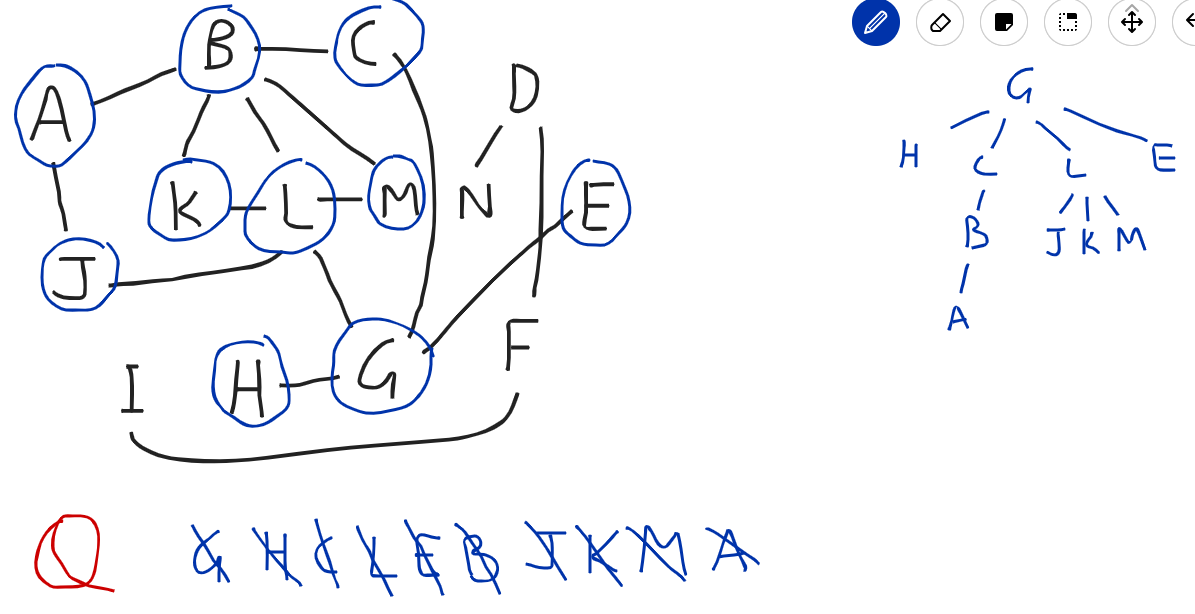

Runtime: Same as DFS, where we may have to visit every edge in the worst-case, which takes $\Theta (|V| + |E|)$ time

**Single-Source Shortest Path:**

If our graph is weighted, then we often care about finding the shortest path between two vertices in terms of the total edge weight (as opposed to number of edges). Neither BFS nor DFS will guarantee generating such a path. Instead, we use another algorithm like Bellman-Ford and Dijkstra.

For both of these algorithms, we consider a single starting vertex (like BFS/DFS)

Bellman-Ford: We initialize a cost array (denoting the total cost of the shortest path from start vertex to current vertex), where all values are initially $\infty$ (haven't found a path yet), except the cost to the starting vertex is 0.

We can optionally maintain a parent array so that we can reconstruct the (shortest) paths later.

We perform several rounds. In each round, we go through every edge. For the edge $(u, v)$ with weight $w$, we check if $cost[u] + w < cost[v]$. If so, we update $cost[v] = cost[u] + w$ (and also set the parent of $v$ to $u$).

How many rounds do we need? At most $|V| - 1$ rounds may be needed. If we complete a round with no changes, then we can end immediately.

After the first round of Bellman-Ford:

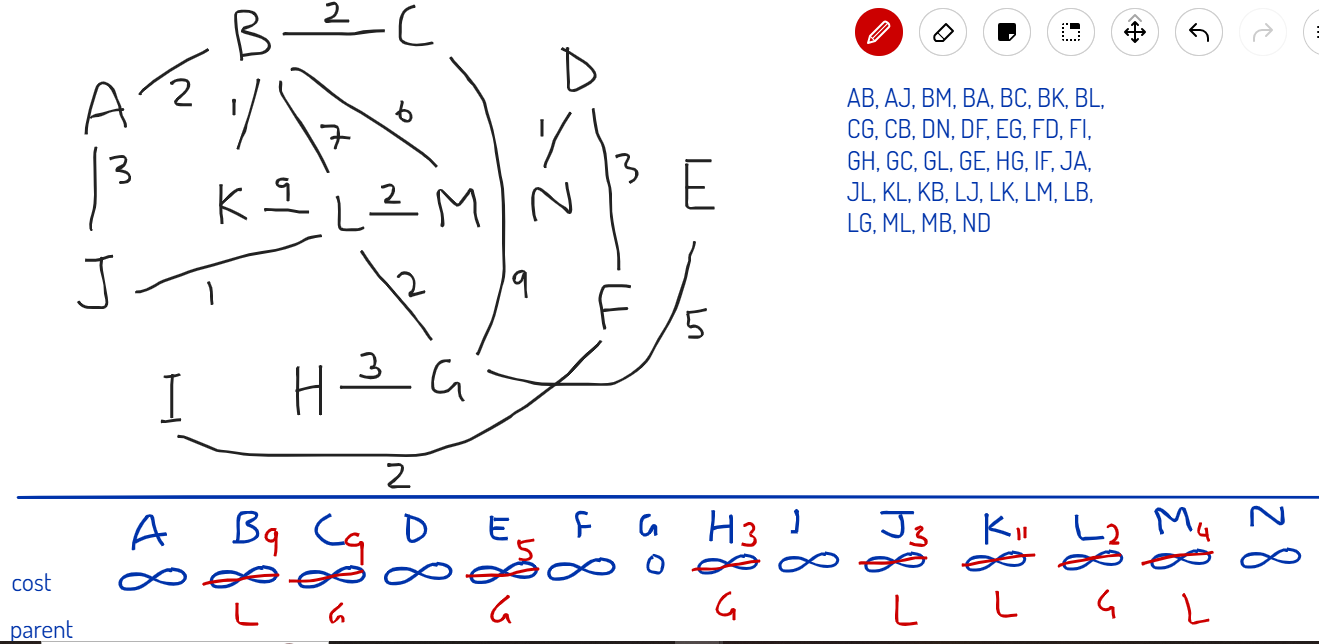

After all rounds of Bellman-Ford:

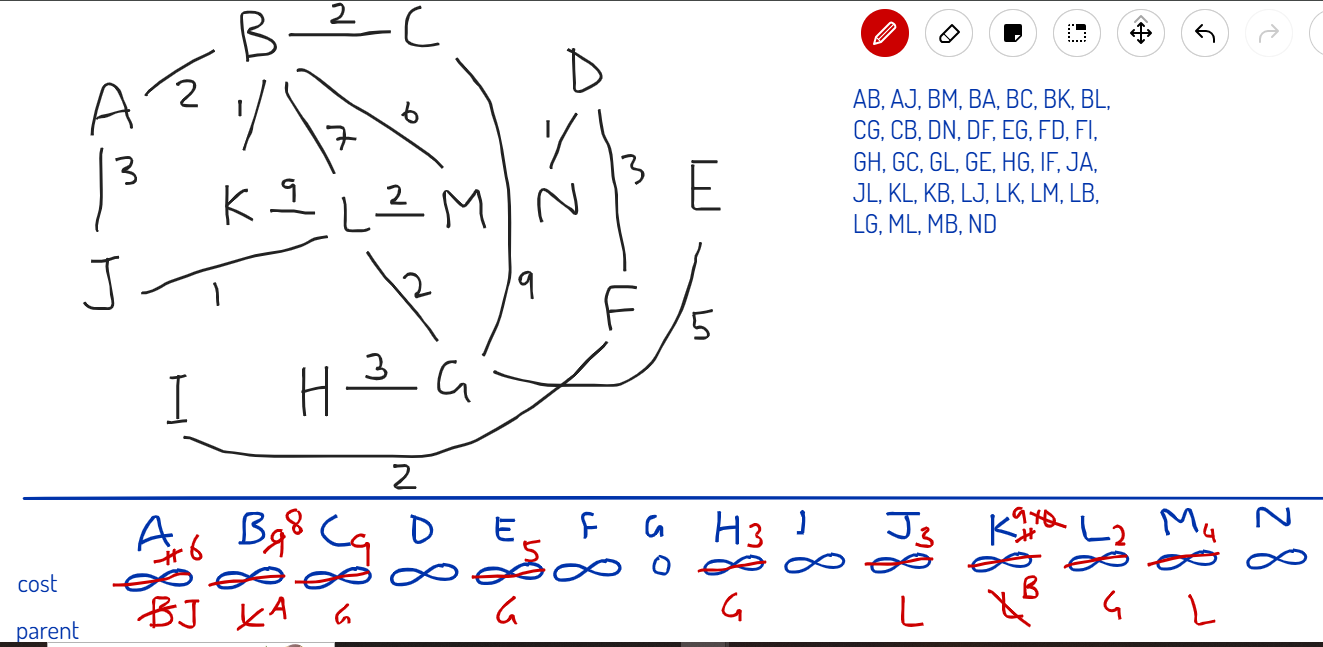

Runtime Analysis: Each round will take $\Theta (|E|)$ to go through all edges. We will perform $|V| - 1$ rounds in the worst-case, so the overall runtime is $\Theta (|V||E|)$ in the worst-case.

Best-case (if we end early when there are no changes) is $\Theta (|V| + |E|)$ because we still need to perform one round, and initializing cost array takes $\Theta (|V|)$ time.